In [6]:
%%time
# !pip3 install pandas
import pandas
dados = pandas.DataFrame()

CPU times: user 1.69 ms, sys: 596 µs, total: 2.28 ms
Wall time: 2.44 ms



#  Amostragem

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread,imsave

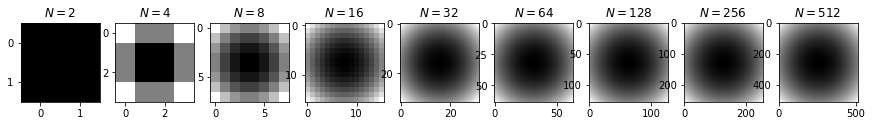

In [9]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2


numResolucoes = 9
factors = [2,4,8,16,32,64,128,256,512]

fig, ax = plt.subplots(1, numResolucoes, figsize=(15, 4))

for i in range(numResolucoes):
    image = circle_image(np.linspace(-1, 1, num=factors[i]), np.linspace(-1, 1, num=factors[i]))
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title('$N = {}$'.format(factors[i]))
    
    
    
#N é a quantidade de pixels da imagem

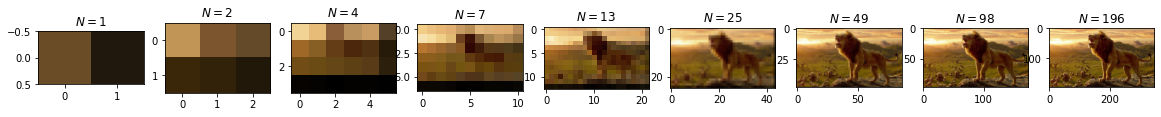

In [13]:
imagem = imread('leao.jpg')

from skimage.transform import downscale_local_mean

factors = factors[::-1]

figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))

for factor, ax in zip(factors, axis):
    
    image = downscale_local_mean(imagem, 
                 factors=(factor, factor, 1)).astype(int)
    
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

imsave("sauda.jpg", imagem)


 #  Quantização
 
 ## Quantização de imagem envolve a redução da intensidade dos valores de uma imagem contínua

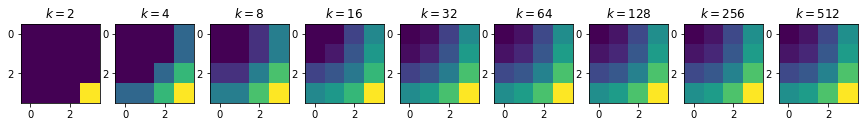

In [7]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2


numResolucoes = 9
factors = [2,4,8,16,32,64,128,256,512]


circ_image = circle_image(np.linspace(0, 1, num=4), np.linspace(0, 1, num=4))

fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))

for i, k in enumerate(factors):
    bins = np.linspace(0, circ_image.max(), k)
    image = np.digitize(circ_image, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1)
    ax[i].imshow(image)
    ax[i].set_title('$k = {}$'.format(k))

## Como pode ser observado, a representação das cores de uma imagem é muito melhor à medida que o k cresce.

* Isso significa, na prática, que nós estamos aumentando a quantidade de valores discretos (intensidade da imagem(



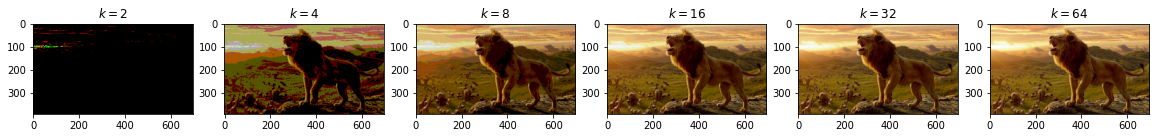

In [10]:
factors = 2**np.arange(1, 7)

figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))

for k, ax in zip(factors, axis):
    bins = np.linspace(0, imagem.max(), k)
    image = np.digitize(imagem, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))